## Importing the required modules

In [67]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import jaccard_similarity_score as j_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Importing the dataset

In [68]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f9bd62c47dc54f13a02bfffb21858955 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='QrWQBnodLzpKkCfB_13fd2VtSlw3FpfjbFae9FP6g1wz',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_f9bd62c47dc54f13a02bfffb21858955.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-fdl66b7mwxxyhg',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

coll = pd.read_csv(body)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [69]:
coll.columns = coll.columns.map(lambda x:x.lower())
coll.columns

Index(['severitycode', 'x', 'y', 'objectid', 'inckey', 'coldetkey', 'reportno',
       'status', 'addrtype', 'intkey', 'location', 'exceptrsncode',
       'exceptrsndesc', 'severitycode.1', 'severitydesc', 'collisiontype',
       'personcount', 'pedcount', 'pedcylcount', 'vehcount', 'incdate',
       'incdttm', 'junctiontype', 'sdot_colcode', 'sdot_coldesc',
       'inattentionind', 'underinfl', 'weather', 'roadcond', 'lightcond',
       'pedrownotgrnt', 'sdotcolnum', 'speeding', 'st_colcode', 'st_coldesc',
       'seglanekey', 'crosswalkkey', 'hitparkedcar'],
      dtype='object')

In [70]:
features = map(lambda x:x.lower(), ['pedcount', 'pedcylcount', 'pedcount', 'LOCATION', 'WEATHER', 'SPEEDING', 'LIGHTCOND', 'ROADCOND', 'JUNCTIONTYPE', 'PERSONCOUNT', 'VEHCOUNT'])
features = list(features)

## Normalizing the data using LabelEncoder

In [71]:
coll['location'] = coll['location'].map(str)
loc_ = LabelEncoder().fit(coll['location'].unique())
coll['location'] = loc_.transform(coll['location'])

In [72]:
coll['weather'] = coll['weather'].map(str)
weather_ = LabelEncoder().fit(coll['weather'].unique())
coll['weather'] = weather_.transform(coll['weather'])

In [73]:
coll['lightcond'] = coll['lightcond'].map(str)
lcond_ = LabelEncoder().fit(coll['lightcond'].unique())
coll['lightcond'] = lcond_.transform(coll['lightcond'])

In [74]:
coll['roadcond'] = coll['roadcond'].map(str)
rcond_ = LabelEncoder().fit(coll['roadcond'].unique())
coll['roadcond'] = rcond_.transform(coll['roadcond'])

In [75]:
coll['junctiontype'] = coll['junctiontype'].map(str)
jt_ = LabelEncoder().fit(coll['junctiontype'].unique())
coll['junctiontype'] = jt_.transform(coll['junctiontype'])

In [76]:
coll['speeding'] = coll['speeding'].map(lambda x:0 if x!='Y' else 1)

In [77]:
coll['severitycode'] -= 1

## Splitting the data into training and testing sets

In [78]:
X = coll[features]
y = coll['severitycode']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Building a Machine Learning Classifier

### DecisionTree Classifier

In [80]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=4).fit(X_train, y_train)

#### Testing the accuracy of our model using jaccard_similarity_score which always lies between 0 and 1

In [81]:
j_score(y_test, dtree.predict(X_test)) # Accuracy on training data

0.750584307178631

In [82]:
j_score(y_train, dtree.predict(X_train)) #Accuracy in testing data

0.7502857363007102

### Checking which parameters are most important to predict the result

In [83]:
pd.Series(dtree.feature_importances_, index=X_train.columns.values).sort_values(ascending=False)

pedcount        0.353348
pedcylcount     0.263978
personcount     0.237333
junctiontype    0.141793
location        0.001517
lightcond       0.001166
vehcount        0.000865
roadcond        0.000000
speeding        0.000000
weather         0.000000
pedcount        0.000000
dtype: float64

In [56]:
!pip install graphviz

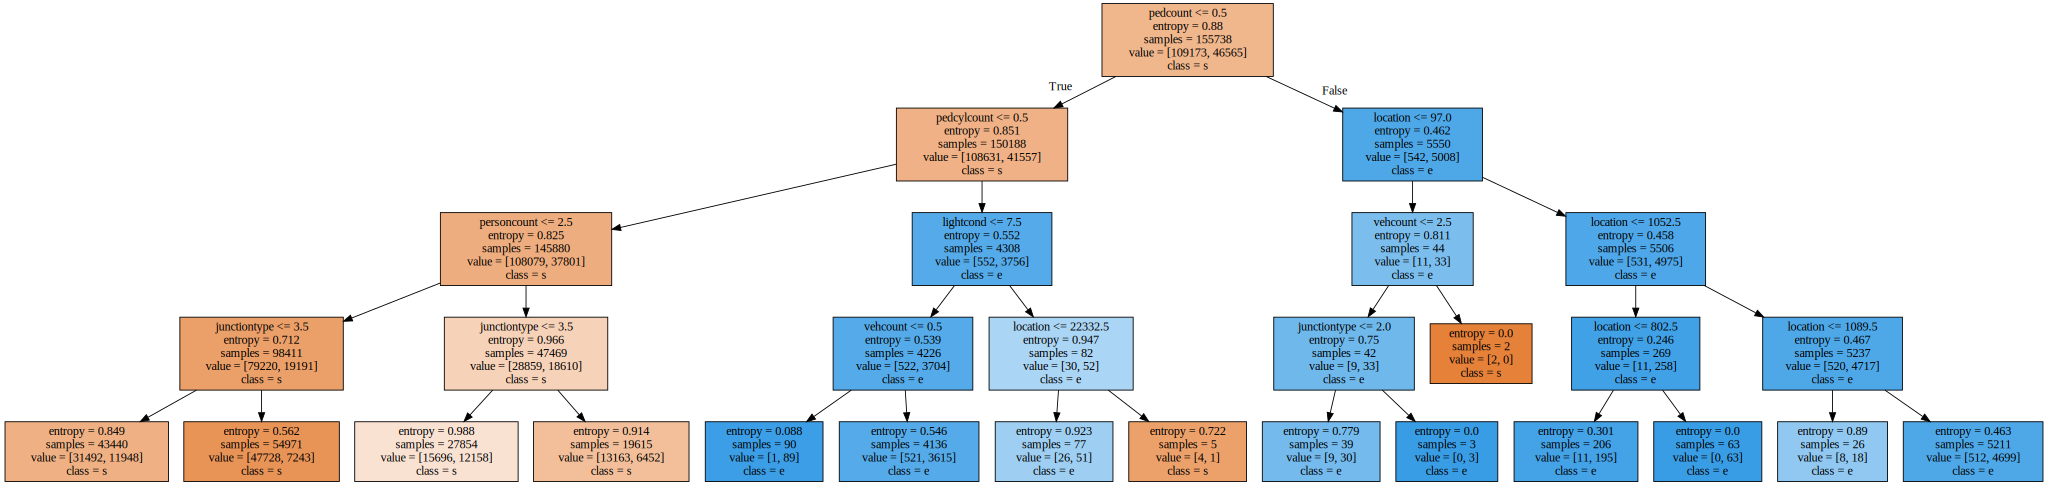

In [84]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=X.columns,  
                                class_names='severitycode',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph